In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
import seaborn as sns

import pysindy as ps
diffs = [
    ('PySINDy Finite Difference', ps.FiniteDifference()),
    ('Smoothed Finite Difference', ps.SmoothedFiniteDifference()),
    ('Savitzky Golay', ps.SINDyDerivative(kind='savitzky_golay', left=0.5, right=0.5, order=3)),
    ('Spline', ps.SINDyDerivative(kind='spline', s=1e-2)),
    ('Trend Filtered', ps.SINDyDerivative(kind='trend_filtered', order=0, alpha=1e-2)),
    ('Spectral', ps.SINDyDerivative(kind='spectral')),
]

plot_kws = dict(alpha=0.7, linewidth=3)
pal = sns.color_palette("Set1")


In [2]:
diffs = [
    ('PySINDy Finite Difference', ps.FiniteDifference()),
    ('Smoothed Finite Difference', ps.SmoothedFiniteDifference()),
    ('Savitzky Golay', ps.SINDyDerivative(kind='savitzky_golay', left=0.5, right=0.5, order=3)),
    ('Spline', ps.SINDyDerivative(kind='spline', s=1e-2)),
    ('Trend Filtered', ps.SINDyDerivative(kind='trend_filtered', order=0, alpha=1e-2)),
    ('Spectral', ps.SINDyDerivative(kind='spectral')),
]

plot_kws = dict(alpha=0.7, linewidth=3)
pal = sns.color_palette("Set1")

In [13]:
noise_level = 0.01

In [13]:
def compare_methods(diffs, x, y, y_noisy):
    n_methods = len(diffs)
    n_rows = (n_methods // 3) + int(n_methods % 3 > 0)
    fig, axs = plt.subplots(n_rows, 3, figsize=(15, 3 * n_rows), sharex=True)

    for (name, method), ax in zip(diffs, axs.flatten()):
     #   ax.plot(x, y_dot, label='Exact', color=pal[0], **plot_kws)
        ax.plot(x, method(y, x), ':', label='Approx.', color='black', **plot_kws)
        ax.plot(x, method(y_noisy, x), label='Noisy', color=pal[1], **plot_kws)
        ax.set(title=name)

    axs[0, 0].legend()
    fig.show()

    return axs

(50,)
(50,)


/home/remy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002231375847617713, tolerance: 0.002115517920193652
  model = cd_fast.enet_coordinate_descent(


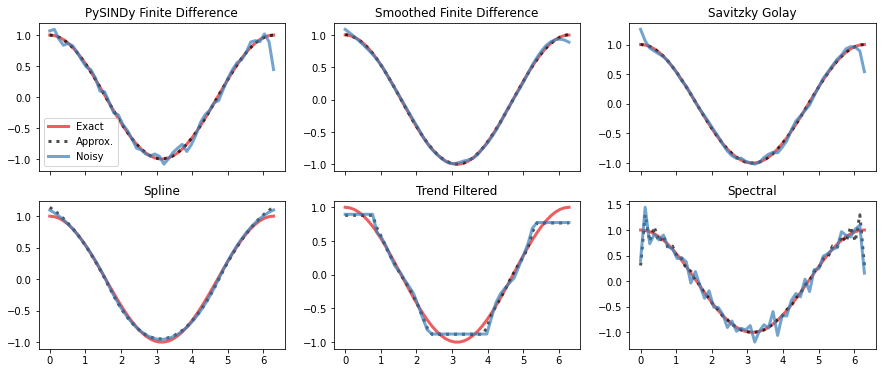

In [60]:
# True data
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
y_dot = np.cos(x)
print(x.shape)
print(y.shape)
# Add noise
seed = 111
np.random.seed(seed)
y_noisy = y + noise_level * np.random.randn(len(y))

axs = compare_methods(diffs, x, y, y_noisy)

In [3]:
data = np.load('experimental_2DAD.npy')

In [4]:
down_data= np.take(np.take(np.take(data,np.arange(0,data.shape[0],1),axis=0),np.arange(0,data.shape[1],1),axis=1),np.arange(0,data.shape[2],1),axis=2)

In [5]:
steps = down_data.shape[2]
width = down_data.shape[0]
width_2 = down_data.shape[1]

In [6]:
x_arr = np.arange(0,width)
y_arr = np.arange(0,width_2)
t_arr = np.arange(0,steps)
x_grid, y_grid, t_grid = np.meshgrid(x_arr, y_arr, t_arr, indexing='ij')
X = np.transpose((t_grid.flatten(), x_grid.flatten(), y_grid.flatten()))

In [7]:
x_arr.shape

(100,)

In [8]:
data[60,:,18].shape

(100,)

In [9]:
y_noisy.shape

NameError: name 'y_noisy' is not defined

In [17]:
x_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

/home/remy/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/home/remy/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/home/remy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.09126825136264, tolerance: 15.089061201157305
  model = cd_fast.enet_coordinate_descent(
/home/remy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.09126825136264, tolerance: 15.089061201157305
  model = cd_fast.enet_coordinate_descent(


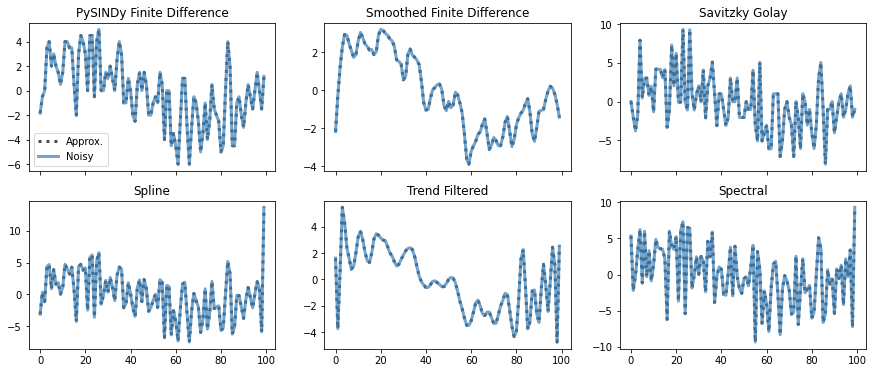

In [16]:
# True data
x = x_arr
y = data[60,:,18]

# Add noise
seed = 111
np.random.seed(seed)
y_noisy = y 

axs = compare_methods(diffs, x, y, y_noisy)

In [30]:
down_data.shape

(100, 100, 10)

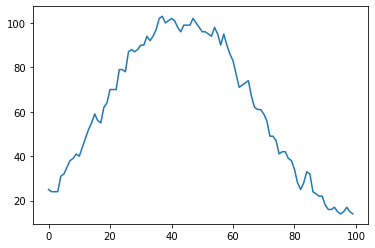

In [15]:
plt.plot(data[60,:,18])

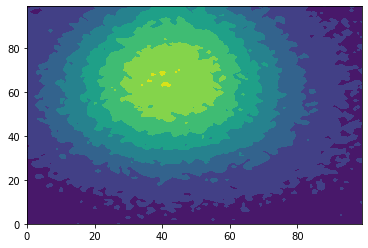

In [39]:
plt.contourf(data[:,:,18])